In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [11]:
data = pd.read_csv('spam.csv',encoding='latin-1') 

In [12]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
X = data['v2']  
y = data['v1']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [17]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [18]:
y_pred = model.predict(X_test_tfidf)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9623318385650225
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



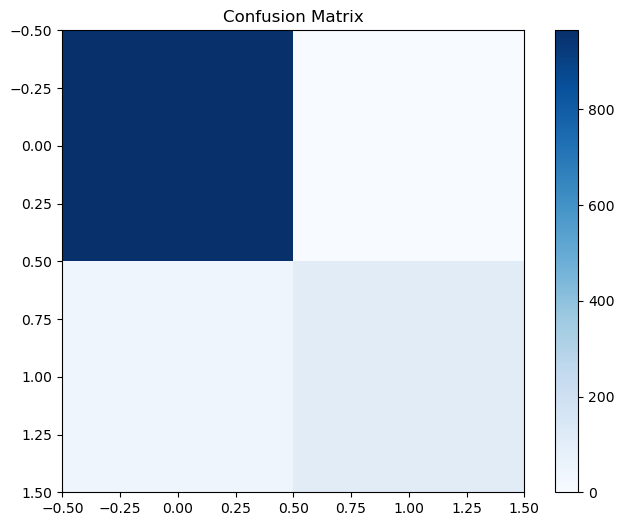

In [20]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()


Text(0.5, 1.0, 'Original Labels Distribution')

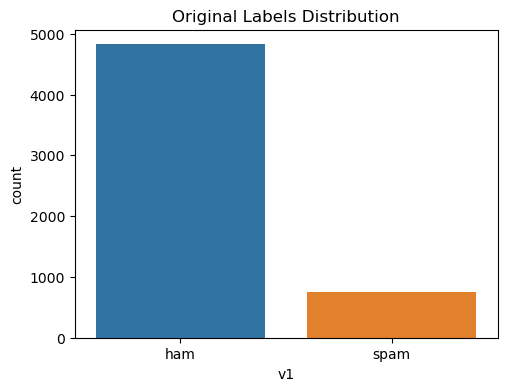

In [25]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='v1')
plt.title('Original Labels Distribution')


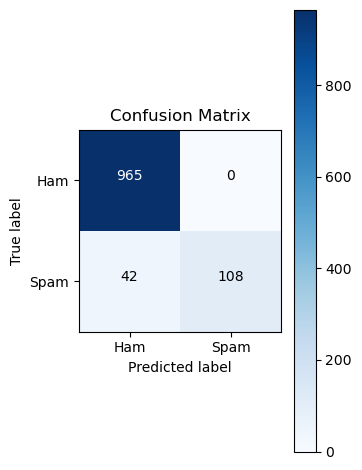

In [26]:
plt.subplot(1, 2, 2)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = [0, 1]
plt.xticks(tick_marks, ['Ham', 'Spam'])
plt.yticks(tick_marks, ['Ham', 'Spam'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()


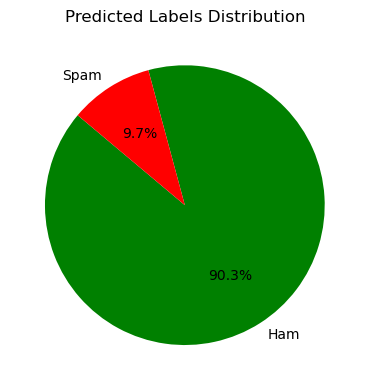

In [27]:
plt.figure(figsize=(6, 4))
plt.pie(pd.Series(y_pred).value_counts(), labels=['Ham', 'Spam'], autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Predicted Labels Distribution')

plt.tight_layout()
plt.show()